# Feature Engineering

Lifecycle of Data Science Project:-
1. Data collection Statergy
2. Feature Engineering --->>> Handling missing values,

What are the different types of Missing Data?
1.  Missing Completely at Random, MCAR:
       A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


2. Missing Data Not At Random(MNAR):
       Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [24]:
import numpy as np
df['cabin_null']=np.where(df['deck'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7721661054994389

3. Missing At Random(MAR);

   Men---hide their salary,
   Women---hide their age

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

Mean/ MEdian /Mode imputation

When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [31]:
df1=sns.load_dataset('titanic')
df = df1[['age', 'fare', 'survived']]
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [32]:
df.isnull().mean()

age         0.198653
fare        0.000000
survived    0.000000
dtype: float64

In [33]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [35]:
median=df.age.median()
median

28.0

In [36]:
impute_nan(df,'age',median)
df.head()

/var/folders/0y/xzwy9cz54g9b7ghtkf3shzlh0000gn/T/ipykernel_7484/3352221935.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,fare,survived,age_median
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


In [38]:
print(df['age'].std())
print(df['age_median'].std())

14.526497332334042
13.019696550973201


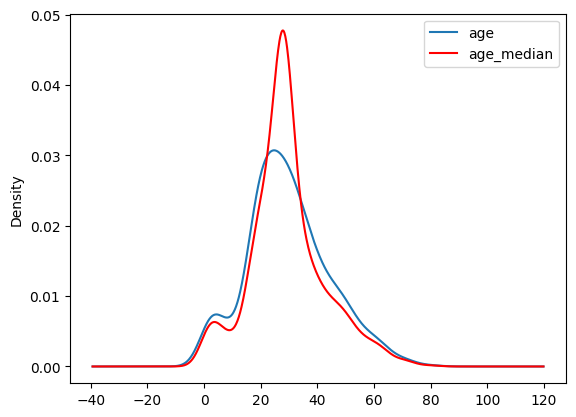

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')